# **Business Case: Yulu**


## About Yulu:

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## Problem Statement:

The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market? 
2. How well those variables describe the electric cycle demands

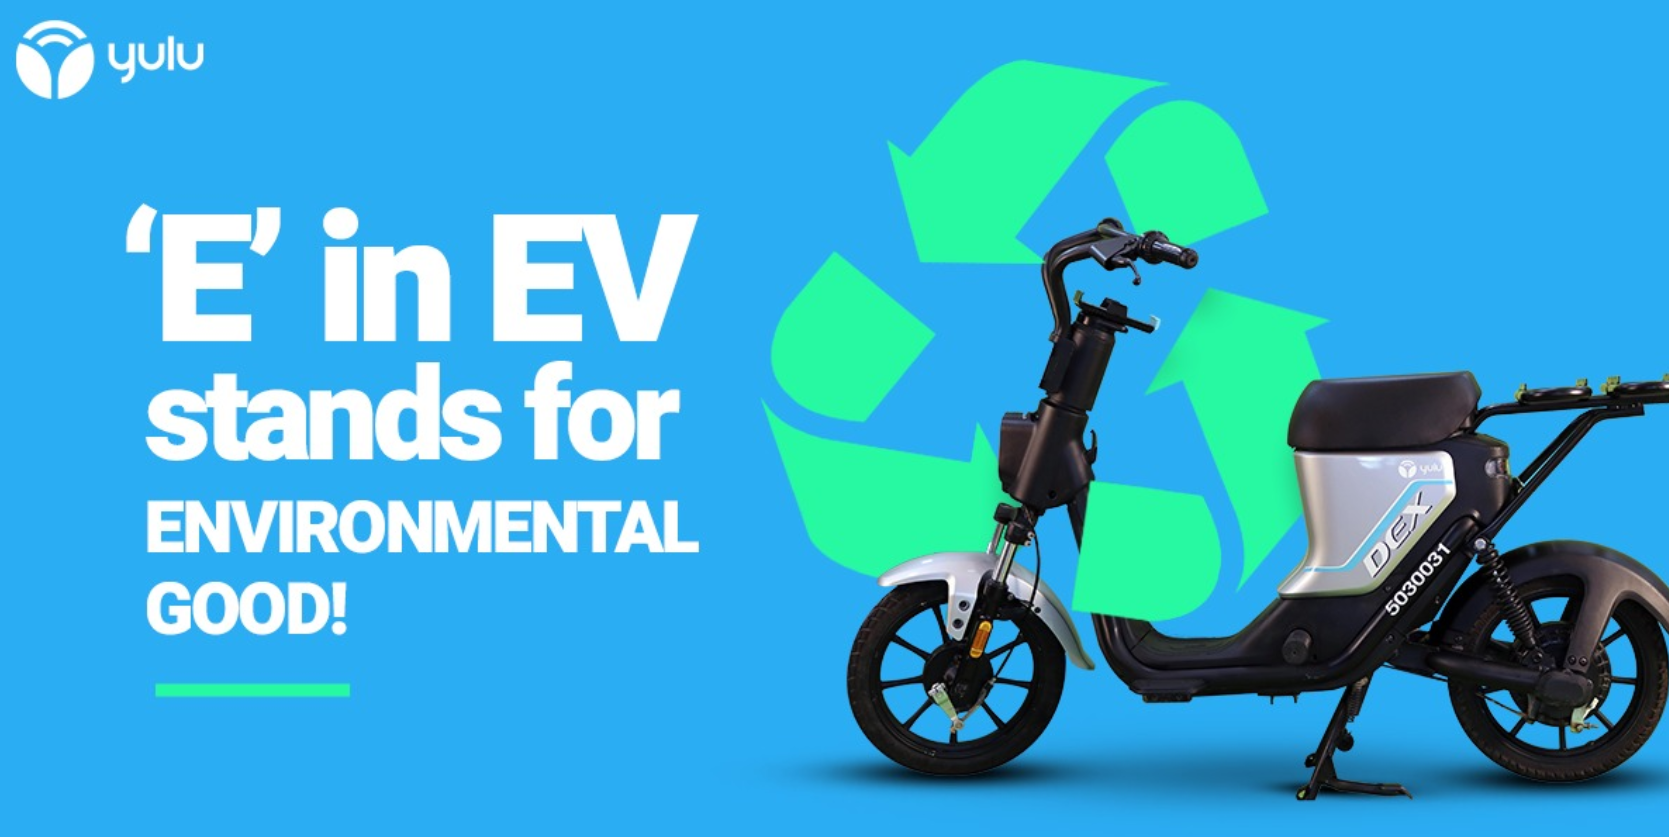

## 1. Import and Exploring Dataset

Exploring the structure and characteristics of the dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.shape

(10886, 12)

In [7]:
df.ndim

2

In [8]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

*#Checking for missing values*

In [10]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Column Profiling:

* datetime: datetime

* season: season (1: spring, 2: summer, 3: fall, 4: winter)

* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

* weather:
    * Clear, Few clouds, partly cloudy, partly cloudy
    * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp: temperature in Celsius

* atemp: feeling temperature in Celsius

* humidity: humidity

* windspeed: wind speed

* casual: count of casual users

* registered: count of registered users

* count: count of total rental bikes including both casual and registered

*#Converting Object datatypes to Iterable datatype*

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

*#Converting categorical attributes into the 'Category' datatype*

In [13]:
df['season']= df['season'].astype('category')
df['holiday']= df['holiday'].astype('category')
df['workingday']= df['workingday'].astype('category')
df['weather']= df['weather'].astype('category')

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


*#Exploring Date and Time for dataset*

In [15]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [16]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [17]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

*#Creating day and replacing season , holiday, weather, workingday column with appropriate values*

In [18]:
df["day_of_week"] = df["datetime"].dt.day_name()

In [19]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df["season"] = df["season"].map(season_mapping)

In [20]:
holiday_mapping = {0: "No", 1: "Yes"}
df["holiday"] = df["holiday"].map(holiday_mapping)

In [21]:
workingday_mapping = {0: "Weekend/Holiday", 1: "Working Day"}
df["workingday"] = df["workingday"].map(workingday_mapping)

In [22]:
weather_mapping = { 1: "Clear/Few clouds/Partly cloudy",
    2: "Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds",
    3: "Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog"}
df["weather"] = df["weather"].map(weather_mapping)

In [23]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week
0,2011-01-01 00:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.84,14.395,75,0.0,0,1,1,Saturday


## 2. Perform Univariate Analysis

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Distribution plots for continuous variables

Text(0.5, 1.0, 'Temperature Distribution')

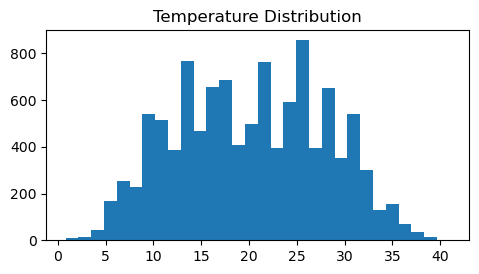

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
plt.hist(df["temp"], bins=30)
plt.title("Temperature Distribution")

Text(0.5, 1.0, 'Humidity Distribution')

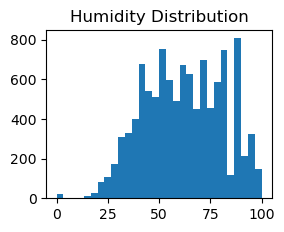

In [27]:
plt.subplot(2,2,2)
plt.hist(df["humidity"], bins=30)
plt.title("Humidity Distribution")

Text(0.5, 1.0, 'Windspeed Distribution')

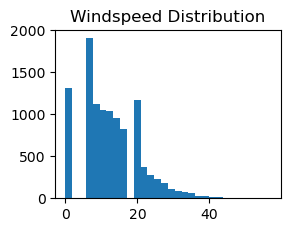

In [28]:
plt.subplot(2,2,3)
plt.hist(df["windspeed"], bins=30)
plt.title("Windspeed Distribution")

Text(0.5, 1.0, 'Electric Bikes Demand Distribution')

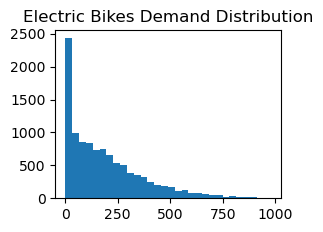

In [29]:
plt.subplot(2,2,4)
plt.hist(df["count"], bins=30)
plt.title("Electric Bikes Demand Distribution")

In [30]:
# Bar plot analysis for categorical variables

Text(0.5, 1.0, 'Season Distribution')

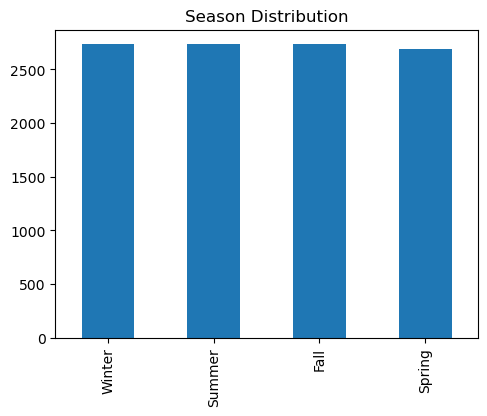

In [31]:
plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
df["season"].value_counts().plot(kind="bar")
plt.title("Season Distribution")

Text(0.5, 1.0, 'Holiday Distribution')

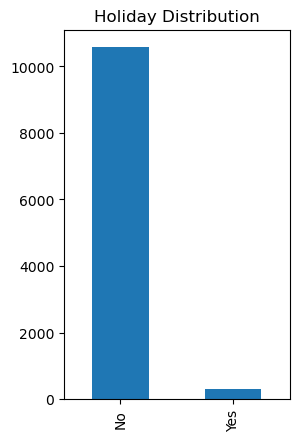

In [32]:
plt.subplot(1,2,2)
df["holiday"].value_counts().plot(kind="bar")
plt.title("Holiday Distribution")

Text(0.5, 1.0, 'Working Day Distribution')

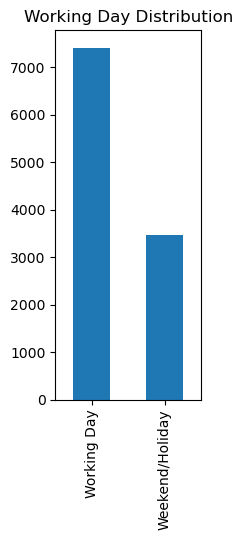

In [33]:
plt.subplot(1,3,3)
df["workingday"].value_counts().plot(kind="bar")
plt.title("Working Day Distribution")

Text(0.5, 1.0, 'Weather Distribution')

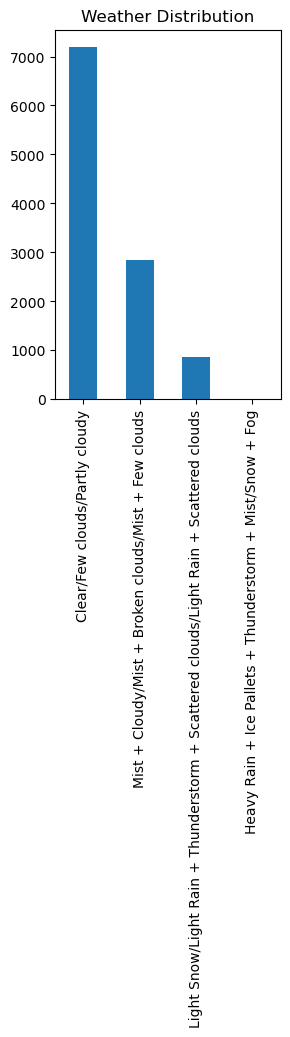

In [34]:
plt.subplot(1,2,2)
df["weather"].value_counts().plot(kind="bar")
plt.title("Weather Distribution")

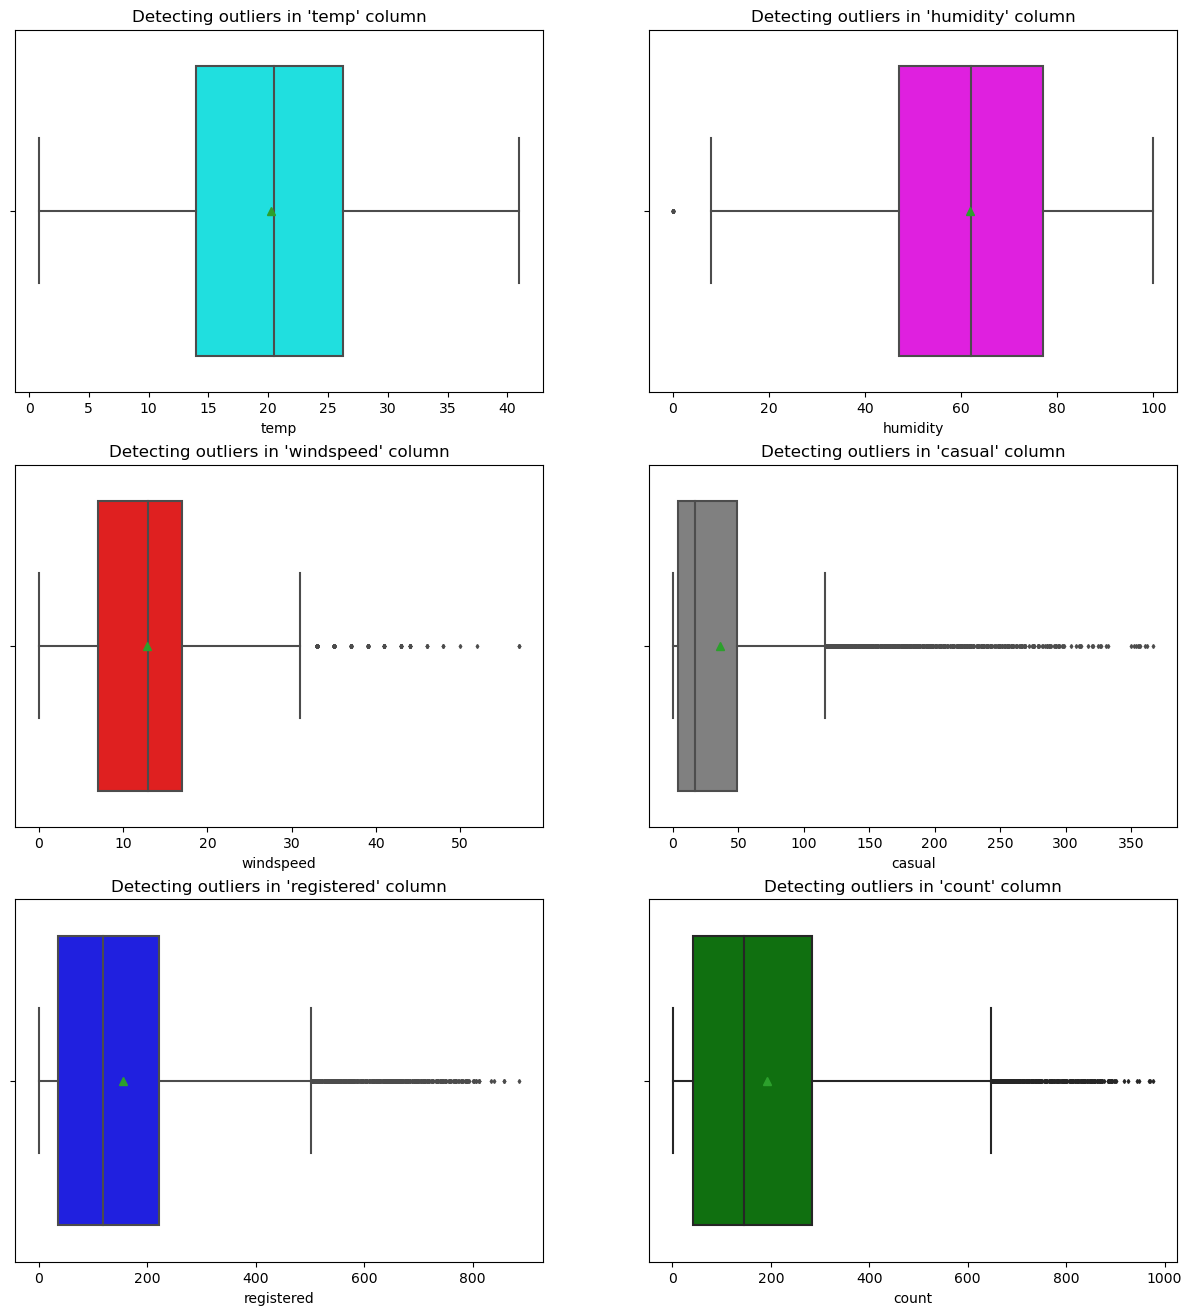

In [35]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
count = 1
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

## 3. Perform Bivariate Analysis

In [36]:
# Relationship between important variables and count

Text(0.5, 1.0, 'Box Plot of Electric Cycles Demand')

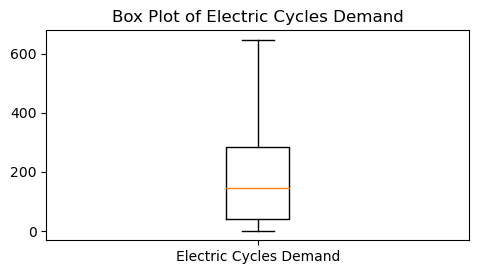

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.boxplot(df["count"], showfliers=False)
plt.xticks([1], ["Electric Cycles Demand"])
plt.title("Box Plot of Electric Cycles Demand")

Text(0.5, 1.0, 'Mean Electric Cycles Demand on Working Day vs Non-Working Day')

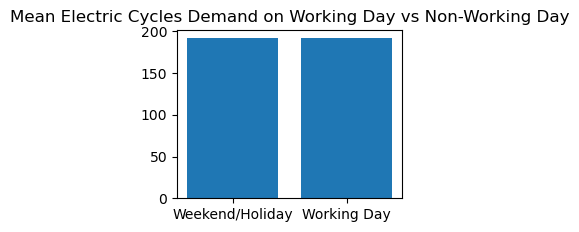

In [38]:
plt.subplot(2, 2, 2)
plt.bar(df["workingday"], df["count"].mean())
plt.title("Mean Electric Cycles Demand on Working Day vs Non-Working Day")

Text(0.5, 1.0, 'Mean Electric Cycles Demand in Different Seasons')

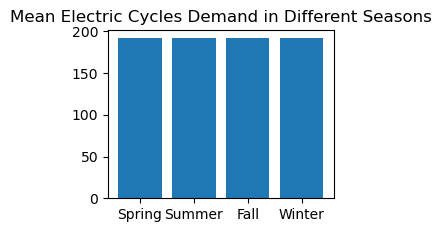

In [39]:
plt.subplot(2, 2, 3)
plt.bar(df["season"], df["count"].mean())
plt.title("Mean Electric Cycles Demand in Different Seasons")

Text(0.5, 1.0, 'Mean Electric Cycles Demand in Different Weather Conditions')

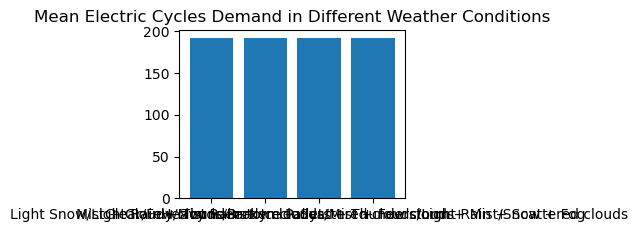

In [40]:
plt.subplot(2, 2, 4)
plt.bar(df["weather"], df["count"].mean())
plt.title("Mean Electric Cycles Demand in Different Weather Conditions")

In [41]:
import warnings

In [42]:
warnings.filterwarnings("ignore")

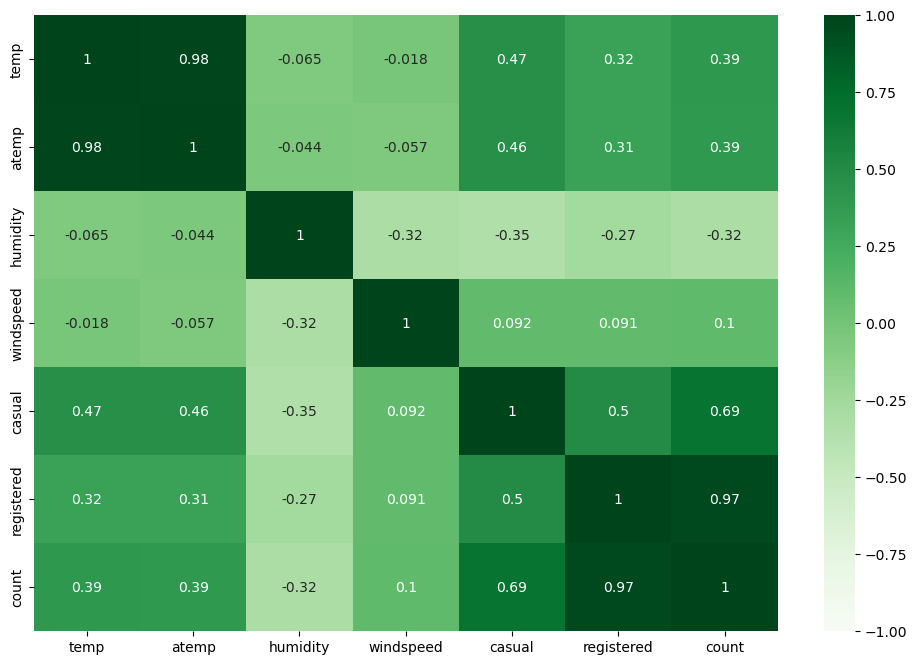

In [43]:
corr_data = df.corr()
corr_data
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot();

## 4. Hypothesis Testing

### 4.1. T - Test
    

#### H0 for 2-Sample T-Test: There is no significant difference in the number of electric cycles rented between working days and non-working days.

#### H1 for 2-Sample T-Test: There is a significant difference in the number of electric cycles rented between working days and non-working days.

In [44]:
import scipy.stats as stats

In [45]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week
0,2011-01-01 00:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,Spring,No,Weekend/Holiday,Clear/Few clouds/Partly cloudy,9.84,14.395,75,0.0,0,1,1,Saturday


In [46]:
working_day= df[df["workingday"] == "Working Day"]["count"]
nonworking_day= df[df["workingday"] == "Weekend/Holiday"]["count"]

In [47]:
alpha = .05

In [48]:
t_stat, p_value = stats.ttest_ind(working_day, nonworking_day, equal_var=False)

t_stat, p_value

(1.2362580418223226, 0.21640312280695098)

In [49]:
if p_value < alpha:
    print("Reject H0 and accept H1")
else:
    print("Reject H1 and accept H0")

Reject H1 and accept H0


#### Conclusion:

Final result of 2 sample T-test is: There is no significant difference in the number of electric cycles rented between working days and non-working days.




### 4.2. ANOVA Test

#### H0 for Anova(Weather): The number of cycles rented is similar across different weather and season.

#### H1 for Anova (Weather): The number of cycles rented is different across different weather and season.

In [50]:
from scipy.stats import f_oneway

In [51]:
# defining the data groups for the ANOVA
alpha = .05

gp1 = df[df['weather']=='Clear/Few clouds/Partly cloudy']['count'].values
gp2 = df[df['weather']=='Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds']['count'].values
gp3 = df[df['weather']=='Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds']['count'].values
gp4 = df[df['weather']=='Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog']['count'].values

gp5 = df[df['season']== 'Spring']['count'].values
gp6 = df[df['season']== 'Summer']['count'].values
gp7 = df[df['season']== 'Fall']['count'].values
gp8 = df[df['season']== 'Winter']['count'].values

# conduct the one-way anova
t_stat, p_value =f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

t_stat, p_value


(127.96661249562491, 2.8074771742434642e-185)

In [52]:
if p_value < alpha:
    print("Reject H0 and accept H1")
else:
    print("Reject H1 and accept H0")

Reject H0 and accept H1


#### Conclusion:

Final result of Anova Test is: The number of cycles rented is different across different weather and season.

### 4.3. Chi-Square Test

#### H0 for Chi-square Test: Weather is independent of the season.

#### H1 for Chi-square Test: Weather is dependent on the season.


In [53]:
from scipy.stats import chi2_contingency

In [54]:
alpha = .05

data_table = pd.crosstab(index = df['season'], 
                          columns = df['weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).replace(np.nan, 0)
print("Observed values:")
data_table

Observed values:


weather,Clear/Few clouds/Partly cloudy,Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds,Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds,Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog
season,,,,
Spring,223009,76406,12919,164
Summer,426350,134177,27755,0
Fall,470116,139386,31160,0
Winter,356588,157191,30255,0


In [55]:
t_stat, p_value, _, _= chi2_contingency(data_table)

t_stat, p_value

(11769.559450959445, 0.0)

In [56]:
if p_value < alpha:
    print("Reject H0 and accept H1")
else:
    print("Reject H1 and accept H0")

Reject H0 and accept H1


#### Conclusion

Final result of Chi-square Test is: Weather is dependent on the season


## 5. Business Insights

* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
* Out of every 100 users, around 19 are casual users and 81 are registered users.
* The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
* There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
* There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
* More than 80 % of the time, the temperature is less than 28 degrees celcius.
* More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
* More than 85 % of the total, windspeed data has a value of less than 20.
* The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
* The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
* There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
* The hourly total number of rental bikes is statistically different for different weathers.
* There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
* The hourly total number of rental bikes is statistically different for different seasons.




## 6. Recommendations

* Seasonal Marketing: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.


* Time-based Pricing: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.


* Weather-based Promotions: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.


* User Segmentation: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.


* Optimize Inventory: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.


* Improve Weather Data Collection: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.


* Customer Comfort: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.


* Collaborations with Weather Services: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.


* Seasonal Bike Maintenance: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.


* Customer Feedback and Reviews: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.


* Social Media Marketing: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.


* Special Occasion Discounts: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.